# Pymaceuticals Inc.
---

### Analysis

1. Capomulin and Ramicane Rule: Capomulin and Ramicane treatments are way better at shrinking tumors than Infubinol and Ceftamin.2. 
The Weight-Tumor Connection: There's a clear trend with Capomulin; heavier mice usually have larger tumors. So, weight seems to play a role in tumor size.3. 
Infubinol's Outlier Alert: Spotted a weird outlier in the Infubinol group. It's way off from the others, making it super interesting to check out why that might be.
Just sharing some quick insig,hts I noticed while exploring the dare.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the number of unique mice IDs
unique_mice = combined_data["Mouse ID"].nunique()
print(f"Unique mice IDs: {combined_df['Mouse ID'].nunique()}")

# Display the data table for preview
combined_data.head(), unique_mice

Unique mice IDs: 249


(  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
 0     k403     Ramicane  Male          21          16          0   
 1     k403     Ramicane  Male          21          16          5   
 2     k403     Ramicane  Male          21          16         10   
 3     k403     Ramicane  Male          21          16         15   
 4     k403     Ramicane  Male          21          16         20   
 
    Tumor Volume (mm3)  Metastatic Sites  
 0           45.000000                 0  
 1           38.825898                 0  
 2           35.014271                 1  
 3           34.223992                 1  
 4           32.997729                 1  ,
 249)

In [3]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice in the study: {number_of_mice}")


Number of unique mice in the study: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(duplicate_mice)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989'
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == duplicate_mouse_id]
print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = 'g989'
cleaned_data = combined_data[combined_data['Mouse ID'] != duplicate_mouse_id]
print(cleaned_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = cleaned_data["Mouse ID"].nunique()
print(f"Number of unique mice in the cleaned dataset: {number_of_mice_cleaned}")

Number of unique mice in the cleaned dataset: 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_by_regimen = cleaned_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].var()
std_deviation_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_deviation_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})
# Display the summary statistics table
print(summary_statistics)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_statistics_agg = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean', 
    median='median', 
    variance='var', 
    std_dev='std', 
    sem='sem'
).rename(columns={
    'mean': 'Mean Tumor Volume', 
    'median': 'Median Tumor Volume', 
    'variance': 'Tumor Volume Variance', 
    'std_dev': 'Tumor Volume Std. Dev.', 
    'sem': 'Tumor Volume SEM'
})

summary_statistics_agg
# Using the aggregation method, produce the same summary statistics in a single line


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

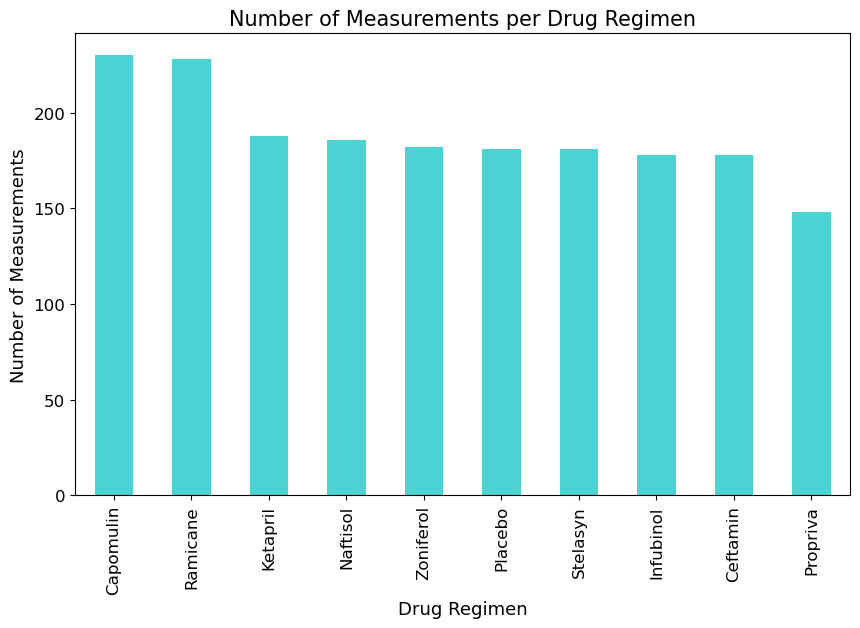

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the total number of measurements (Mouse ID/Timepoints) for each drug regimen
measurements_per_regimen = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using Pandas' built-in plot function
bar_plot = measurements_per_regimen.plot(kind='bar', figsize=(10,6), color='c', alpha=0.7, fontsize=12)

# Setting the title and labels
bar_plot.set_title('Number of Measurements per Drug Regimen', fontsize=15)
bar_plot.set_xlabel('Drug Regimen', fontsize=13)
bar_plot.set_ylabel('Number of Measurements', fontsize=13)

# Display the plot
plt.show()

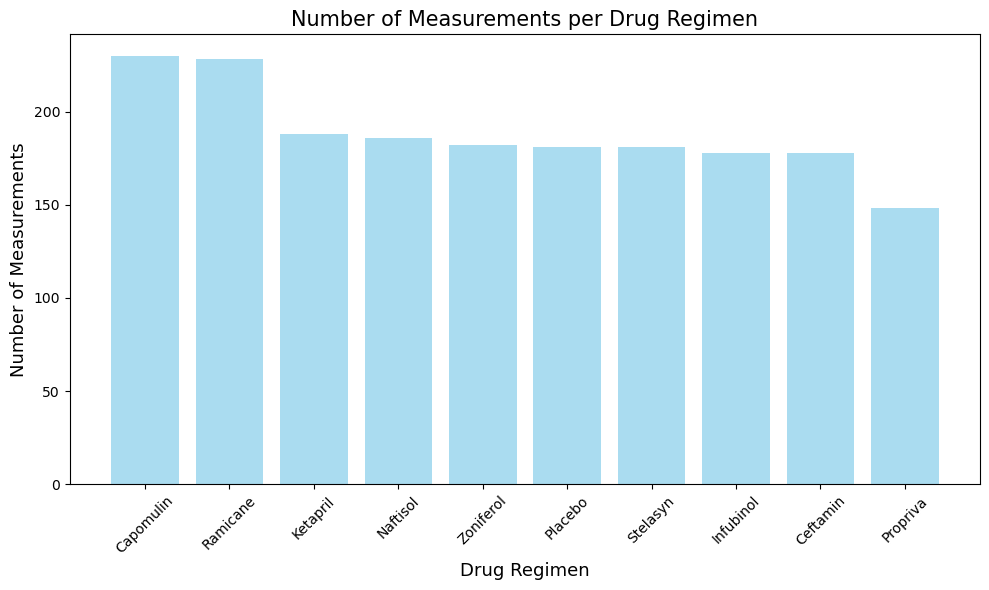

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Get the drug regimen names (indexes of the Series) and respective counts (values of the Series)
regimen_names = measurements_per_regimen.index
measurement_counts = measurements_per_regimen.values

# Generating a bar plot using Matplotlib's Pyplot
plt.figure(figsize=(10,6))
plt.bar(regimen_names, measurement_counts, color='skyblue', alpha=0.7)

# Adding title and labels
plt.title('Number of Measurements per Drug Regimen', fontsize=15)
plt.xlabel('Drug Regimen', fontsize=13)
plt.ylabel('Number of Measurements', fontsize=13)
plt.xticks(rotation=45)  # Rotate the drug regimen names to improve readability

# Display the plot
plt.tight_layout()
plt.show()

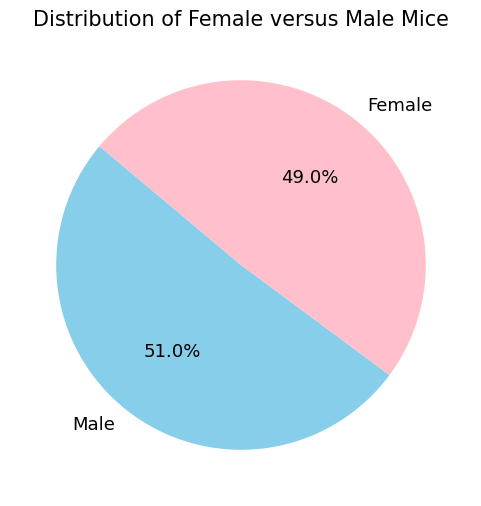

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the distribution of genders in the dataset
gender_distribution = cleaned_data['Sex'].value_counts()

# Generate a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'], fontsize=13, figsize=(6,6))

# Adding title to the plot
plt.title('Distribution of Female versus Male Mice', fontsize=15)

# Removing the y-label as it's not needed for a pie chart
plt.ylabel('')

# Display the plot
plt.show()

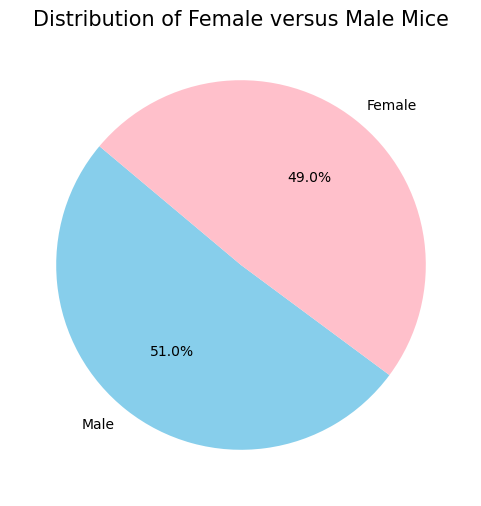

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate the distribution of genders in the dataset
gender_distribution = cleaned_data['Sex'].value_counts()

# Extract the gender names (as labels) and their counts (as sizes)
gender_names = gender_distribution.index
gender_counts = gender_distribution.values

# Generating a pie plot using Pyplot
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_names, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])

# Adding title to the plot for clarity
plt.title('Distribution of Female versus Male Mice', fontsize=15)

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Step 1: Get the last (greatest) timepoint for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 2: Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Step 3: Filter for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_filtered = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'].isin(treatment_regimens)]

final_tumor_volume_filtered

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []  # to store tumor volume data for plotting
outliers_data = {}  # to store outliers data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    # Extract tumor volumes for the current treatment
    treatment_data = final_tumor_volume_filtered[final_tumor_volume_filtered['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(treatment_data)
    
    # Calculate quartiles, IQR, and identify outliers
    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
   # Determine outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Store data about outliers for each treatment
    outliers_data[treatment] = {
        "Lower Quartile": lowerq,
        "Upper Quartile": upperq,
        "IQR": iqr,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers": outliers.tolist()  # Convert to list
    }

outliers_data


{'Capomulin': {'Lower Quartile': 32.37735684,
  'Upper Quartile': 40.1592203,
  'IQR': 7.781863460000004,
  'Lower Bound': 20.70456164999999,
  'Upper Bound': 51.83201549,
  'Outliers': []},
 'Ramicane': {'Lower Quartile': 31.56046955,
  'Upper Quartile': 40.65900627,
  'IQR': 9.098536719999998,
  'Lower Bound': 17.912664470000003,
  'Upper Bound': 54.30681135,
  'Outliers': []},
 'Infubinol': {'Lower Quartile': 54.04860769,
  'Upper Quartile': 65.52574285,
  'IQR': 11.477135160000003,
  'Lower Bound': 36.83290494999999,
  'Upper Bound': 82.74144559000001,
  'Outliers': [36.3213458]},
 'Ceftamin': {'Lower Quartile': 48.72207785,
  'Upper Quartile': 64.29983003,
  'IQR': 15.577752179999997,
  'Lower Bound': 25.355449580000002,
  'Upper Bound': 87.66645829999999,
  'Outliers': []}}

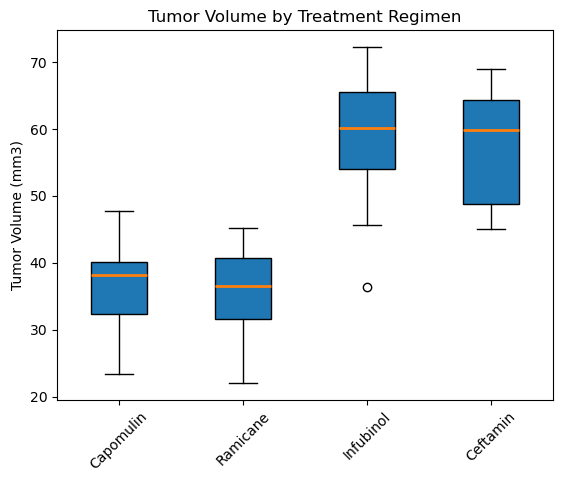

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# List of treatments for plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig, ax = plt.subplots()
ax.set_title('Tumor Volume by Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

# Generate the box plot
ax.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, medianprops={'linewidth': 2})

# Customize the boxplot
ax.set_xticklabels(treatments, rotation=45)

plt.show()

## Line and Scatter Plots

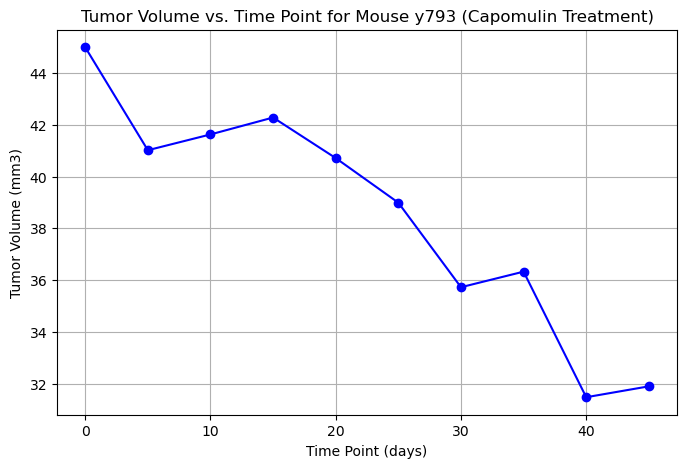

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select data for a single mouse treated with Capomulin, assuming mouse ID is 'y793'
mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == 'y793') & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Generate the line plot
plt.figure(figsize=(8,5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')

# Adding title and labels
plt.title('Tumor Volume vs. Time Point for Mouse y793 (Capomulin Treatment)')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

# Display the plot
plt.show()


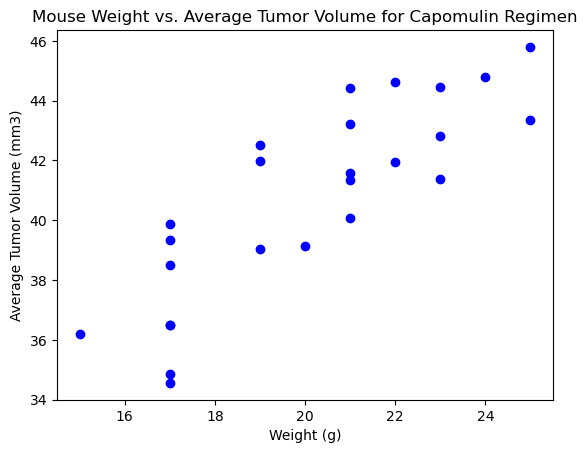

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse under the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue')

# Adding titles and labels for clarity
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is: 0.84


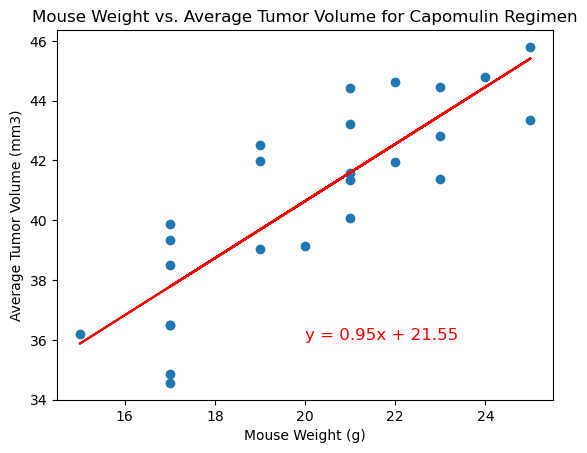

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress, pearsonr

# Extract the weight and average tumor volume data for correlation and linear regression analysis
x_values = average_tumor_volume['Weight (g)']
y_values = average_tumor_volume['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation = pearsonr(x_values, y_values)[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (20, 36), fontsize=12, color="red")

# Print the correlation coefficient
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is: {correlation:.2f}")

plt.show()